In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

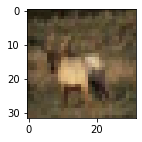

In [5]:
py.figure(figsize = (10,2))
py.imshow(X_train[3])

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def get_fig(x,index):
    py.figure(figsize = (10,2))
    py.imshow(x[index])
    py.xlabel(classes[y_train[index][0]])

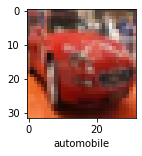

In [8]:
get_fig(X_train, 5)

In [9]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [10]:
y_train_categorical = keras.utils.to_categorical(
            y_train, num_classes = 10, dtype = 'float'
)
y_train_categorical[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
y_test_categorical = keras.utils.to_categorical(
            y_test, num_classes = 10, dtype = 'float'
)
y_test_categorical[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [12]:
# Ann Model

In [13]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

ann_model.compile(
        optimizer = 'SGD',
        metrics = ['accuracy'],
        loss = 'categorical_crossentropy'
)

ann_model.fit(X_train_scaled, y_train_categorical, epochs= 8)

Epoch 1/8
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8556 - accuracy: 0.3369
Epoch 2/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6738 - accuracy: 0.4073
Epoch 3/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5970 - accuracy: 0.4327
Epoch 4/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5423 - accuracy: 0.4531
Epoch 5/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4966 - accuracy: 0.4711
Epoch 6/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4573 - accuracy: 0.4833
Epoch 7/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4231 - accuracy: 0.4954
Epoch 8/8
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3958 - accuracy: 0.5064


In [14]:
ann_model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 2s 5ms/step - loss: 1.5909 - accuracy: 0.4552


[1.5909212827682495, 0.4551999866962433]

In [15]:
from sklearn.metrics import classification_report

pred = ann_model.predict(X_test_scaled)
pred_res = [np.argmax(i) for i in pred]

print(classification_report(y_test, pred_res))

              precision    recall  f1-score   support

           0       0.72      0.33      0.45      1000
           1       0.42      0.77      0.54      1000
           2       0.40      0.36      0.38      1000
           3       0.39      0.26      0.31      1000
           4       0.39      0.46      0.42      1000
           5       0.52      0.27      0.35      1000
           6       0.59      0.46      0.52      1000
           7       0.71      0.36      0.48      1000
           8       0.52      0.65      0.58      1000
           9       0.34      0.64      0.44      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [16]:
# Implementing CNN

In [18]:
cnn_model = keras.Sequential([
    
    # convocolational layer 
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    
    #dense n/w
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'), 
    keras.layers.Dense(10, activation = 'softmax')
])

cnn_model.compile(
        optimizer = 'adam', 
        metrics = ['accuracy'],
        loss = 'categorical_crossentropy'
)

cnn_model.fit(X_train_scaled, y_train_categorical, epochs = 8)

Epoch 1/8
1563/1563 [==============================] - 37s 23ms/step - loss: 1.4817 - accuracy: 0.4694
Epoch 2/8
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1202 - accuracy: 0.6080
Epoch 3/8
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9884 - accuracy: 0.6553
Epoch 4/8
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9039 - accuracy: 0.6861
Epoch 5/8
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8423 - accuracy: 0.7071
Epoch 6/8
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7914 - accuracy: 0.7248
Epoch 7/8
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7445 - accuracy: 0.7405
Epoch 8/8
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7032 - accuracy: 0.7552


In [19]:
from sklearn.metrics import classification_report

pred = cnn_model.predict(X_test_scaled)
pred_res = [np.argmax(i) for i in pred]

print(classification_report(y_test, pred_res))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1000
           1       0.90      0.70      0.79      1000
           2       0.60      0.52      0.56      1000
           3       0.49      0.54      0.51      1000
           4       0.56      0.72      0.63      1000
           5       0.60      0.58      0.59      1000
           6       0.67      0.84      0.75      1000
           7       0.83      0.66      0.73      1000
           8       0.82      0.76      0.79      1000
           9       0.73      0.82      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.70      0.68      0.69     10000

